Bitte erstell ein neues Jupyter-Notebook und nennen es Klassifikation.

Wir nutzen ein Datenset, das handschriftliche Ziffern in Form von 8x8 Feldern mit Werten der Farbstärkte darstellt. Eine Beschreibung des Datensets gib es bei scikit-learn und im UC Irvine Machine Learning Repository. Dieses Datenset bringt scikit-learn selber mit.

Wir importieren eine Funktion zum Laden des Datensets und rufen dieses auf.

Crie um novo notebook Jupyter e nomeie-o como Classificação. 
Usamos um conjunto de dados que representa dígitos manuscritos na forma de campos 8x8 com valores de intensidade de cor. Uma descrição do conjunto de dados está disponível em scikit-learn e no UC Irvine Machine Learning Repository. O próprio scikit-learn fornece esse conjunto de dados. 
Importamos uma função para carregar o conjunto de dados e chamá-lo.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

Die Daten und Metadaten sind in einem sogenannten Bunch-Objekt organisiert.
Os dados e metadados são organizados em um chamado objeto Bunch

In [3]:
type(digits)

sklearn.utils._bunch.Bunch

Dieser Bunch hat folgende Attribute.
Este grupo tem os seguintes atributos.

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Schauen wir uns mal die Beschreibung an. Vamos dar uma olhada na descrição

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Die eigentlichen Daten sind in einem numpy-Array abgelegt. Os dados reais são armazenados em uma matriz numpy.

In [6]:
type(digits.data)

numpy.ndarray

Schauen wir es uns mal an. Vamos dar uma olhada.

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Schauen wir uns die Dimension der Matrix an - es handelt sich um eine zweidimentionsale Matrix mit 1797 Zeilen und 64 Spalten. Es sind 1797 Bilder (also weniger als die originalen 5620) und 64 Features (eine lineare Darstellung der 8x8 Felder-Farbintensitätswerte). Vejamos a dimensão da matriz - é uma matriz bidimensional com 1.797 linhas e 64 colunas. Existem 1.797 imagens (menos que as 5.620 originais) e 64 recursos (uma representação linear dos valores de intensidade de cor do campo 8x8).

In [8]:
digits.data.shape

(1797, 64)

Das Target-Attribute ist ebenfalls ein numpy-array … O atributo target também é um array numpy...

In [9]:
type(digits.target)

numpy.ndarray

… allerding mit nur einer Dimension. ...mas com apenas uma dimensão.

In [10]:
digits.target.shape

(1797,)

Jeder Wert entspricht der geschriebenen Nummer. Cada valor corresponde ao número escrito

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Das Bunch-Objekt hat noch das Attribute target_names. Normalerweise wird jeder Zahl in targent hier ein Name zugeordnen. Da es sich aber tatsächlich um Ziffern von 0 - 9 handelt, ist das in diesem nicht nötig. O objeto Bunch ainda possui o atributo target_names. Normalmente, cada número no alvo recebe um nome aqui. Como na verdade são números de 0 a 9, isso não é necessário aqui.

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In diesem Datenset gibt es zusätzlich noch ein Attribute images. Es enthält für jede geschrieben Ziffer die Farbwerte in ein 8x8-Matrix. Neste conjunto de dados também existe um atributo imagens. Ele contém os valores das cores de cada dígito escrito em uma matriz 8x8.

In [13]:
len(digits.images)

1797

Schauen wir uns zum Beispiel das erste Bild an … Por exemplo, vejamos a primeira foto...

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

… oder das zehnte Bild. ...ou a décima foto

In [15]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

Wir können die in dieser Form gespeicherten Farbintensitäten auch mit matplotlib anzeigen lassen. Hier zum Beispiel für die ersten 30 Bilder (wenn man mehr haben möchte, muss man in subplot mehr als 3 Zeilen angeben). Também podemos exibir as intensidades de cores armazenadas neste formulário usando matplotlib. Aqui, por exemplo, para as primeiras 30 imagens (se quiser mais, é necessário especificar mais de 3 linhas na subtrama).

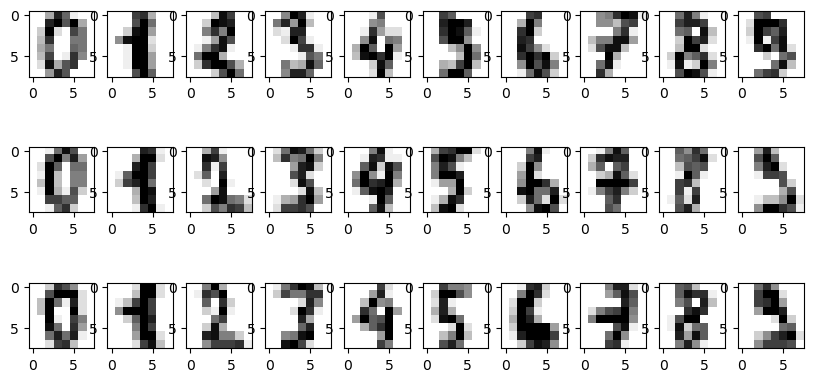

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 10, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

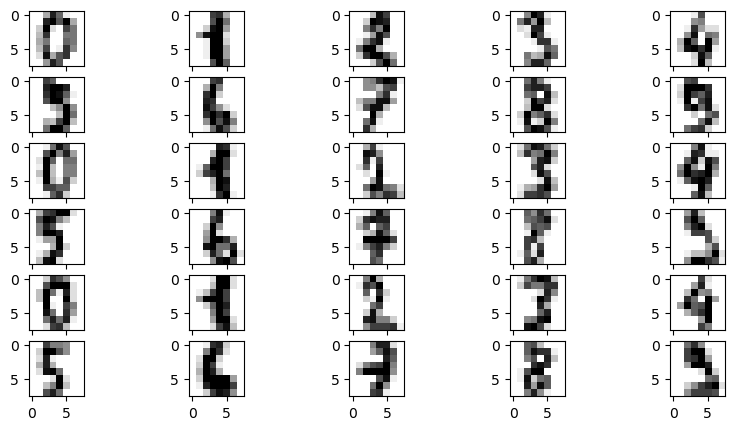

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(6, 5, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

Um einen Klassifikator für ein Klassifikation zu trainieren und dann später seine Güte zu bewerten, wird das Datenset (genauer gesagt die Attribute data und target) in ein Trainingsset (75%) und Testset (25%) aufgeteilt. Die Konvention ist hier eine großes X für den Variablen der Datenmatrix und ein kleines y für den Target-Vektor zu nutzen.

Anmerkung: Bei einigen der folgenden Schritte wird von zufälligen Zuständen ausgegagen. Um diese fest zu setzen und somit die Analyse reproduzierbar zu machen, kann man den Parameter random_state nutzen und mit einer Zahl versehen.

Para treinar um classificador para uma classificação e posteriormente avaliar sua qualidade, o conjunto de dados (mais precisamente os atributos dados e alvo) é dividido em conjunto de treinamento (75%) e conjunto de teste (25%). A convenção aqui é usar um X grande para a variável da matriz de dados e um y pequeno para o vetor de destino.

Nota: Algumas das etapas a seguir assumem estados aleatórios. Para definir isso e assim tornar a análise reproduzível, você pode usar o parâmetro random_state e atribuir-lhe um número.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)

Die Maße der zweidimensionalen Trainigs-Daten-Matrix: As dimensões da matriz de dados de treinamento bidimensional:

In [18]:
X_train.shape

(1347, 64)

Die Maße der zweidimensionalen Test-Daten-Matrix: As dimensões da matriz de dados de teste bidimensional:

In [19]:
X_test.shape

(450, 64)

Die Länge des Trainingsvektor entspricht der Anzahl an Zeilen der Trianingsmatrix. O comprimento do vetor de treinamento corresponde ao número de linhas da matriz de triagem.

In [20]:
y_train.shape

(1347,)

Die Länge des Testsvektors entspricht der Anzahl an Zeilen der Testsmatrix. O comprimento do vetor de teste corresponde ao número de linhas da matriz de teste.

In [21]:
y_test.shape

(450,)

Wir werden zuerst mit einem k-Nearest-Neighbor-Klassifizierer Arbeiten und laden dazu die Klasse … Primeiro trabalharemos com um classificador k-vizinho mais próximo e carregaremos a classe...

In [22]:
from sklearn.neighbors import KNeighborsClassifier

… und erzeugen ein Objekt davon. Hierbei können wird die Anzahl an zu betrachteten Nachbarn angeben: ... e crie um objeto a partir dele. Aqui podemos especificar o número de vizinhos a serem considerados:

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

Jetzt trainieren wir den Klassifikator mit den Trainingsdaten. Dafür wird in scikit-learn unabhängig von Klassifikator die Methode fit genutzt. Agora treinamos o classificador com os dados de treinamento. Para tanto, o método fit é utilizado no scikit-learn, independente do classificador.

In [24]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Herzlichen Glückwunsch - wir haben unser aller erstes Klassifikator-Modell gebaut und trainiert. Jetzt kann mit diesem neue Daten (also Vektoren der Länger 64, die die 8x8 Bilder darstellen) klassifizieren - in diesem Fall also um vorauszusagen, welche Ziffer dargestellt wurde.

Wir haben unsere Testdaten noch verfügbar und können die Methode predict des trainierten Klassifiers nutzen und erhalten die Voraussagen.

Parabéns – construímos e treinamos nosso primeiro modelo de classificador. Agora você pode usar isso para classificar novos dados (ou seja, vetores de comprimento 64 que representam as imagens 8x8) - neste caso, para prever qual dígito foi exibido.

Ainda temos nossos dados de teste disponíveis e podemos usar o método de previsão do classificador treinado e obter as previsões.

In [35]:
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

Da wir für das Testset wissen welche Ziffern tatsächlich herauskommen sollte, können wir die Methode score des Klassifiers nutzen. Diese führt die Voraussage durch und vergleicht sie mit den tatsächlichen Target-Werten. Am Ende bekommen wir einen Wert zwischen 0 (schlecht) und 1 (gut).

Como sabemos quais dígitos realmente devem aparecer no conjunto de teste, podemos usar o método score do classificador. Isso executa a previsão e a compara com os valores alvo reais. No final obtemos um valor entre 0 (ruim) e 1 (bom).

In [26]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [43]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [45]:
knn_clf.score(X_test, y_test)

0.9911111111111112

Führen sie das gleich Verfahren mit einen k-Nearest-Neighbor-Klassifizierer selbstständig durch, der 3 Nachbar betrachtet (Code hier nicht angezeigt).

Das schöne an scikit-learn ist, dass alle Klassifikatoren die gleichen Methoden besitzten. Sprich anderen Klassifikatoren nutzen auch fit, predict und score.

Machen wir nun eine Klassifikation mit einem Random-Forest-Klassifikator ganz äquivalent zu der vorherigen Herangehensweise:

Execute o mesmo procedimento de forma independente com um classificador de k-vizinhos mais próximos que considera 3 vizinhos (código não mostrado aqui).

O bom do scikit-learn é que todos os classificadores têm os mesmos métodos. Outros classificadores também usam ajuste, previsão e pontuação.

Vamos agora fazer uma classificação com um classificador florestal aleatório completamente equivalente à abordagem anterior:

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_cfl = RandomForestClassifier(random_state=1)

In [29]:
random_forest_cfl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [30]:
random_forest_cfl.score(X_test, y_test)

0.98

Das gleiche machen wir nun für eine Klassifikation mit einem künstlichen, neuralen Netz (Multi-Layer-Perceptron). Standardmäßig hat das Netz ein eine Hidden-Layer mit 100 Nodes.

Agora fazemos o mesmo para uma classificação com uma rede neural artificial (perceptron multicamadas). Por padrão, a rede possui uma camada oculta com 100 nós.


In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
mlpc = MLPClassifier(random_state=1)
mlpc.fit(X_train, y_train)

MLPClassifier(random_state=1)

In [33]:
mlpc.score(X_test, y_test)

0.9755555555555555

Wir können die Anzahl an Hidden-Layer und Anzahl an Nodes in diesen als Parameter setzen (hier 3 Schichten mit mit 200, 100 und 20 Nodes). Man kann die Schritte kondenensiert schreiben, indem man die Methodenaufrufe direkt verknüpft.

Podemos definir o número de camadas ocultas e o número de nós nelas como parâmetros (aqui 3 camadas com 200, 100 e 20 nós). Você pode escrever as etapas condensadas vinculando diretamente as chamadas de método.

In [34]:
MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100, 20)).fit(
    X_train, y_train).score(X_test, y_test)

0.9844444444444445

Es gibt noch viele weitere Klassifikatoren in scikit-learn. Für einen Einführung sollten dies 3 Bespiele aber reichen. Wir konnten hier aber sehen, wie einfach sklearn es uns auf Grund der kosistenten Methoden macht, verschiedene Klassifikationsmethode zu nutzen.

Existem muitos mais classificadores no scikit-learn. Mas estes 3 exemplos devem ser suficientes para uma introdução. Mas podemos ver aqui como o sklearn facilita o uso de diferentes métodos de classificação devido aos seus métodos consistentes.